SVM Accuracy:  0.867
SVM Precision:  0.8677354709418837
SVM Recall:  0.866
SVM F1 Score:  0.8668668668668669
Confusion Matrix:
 [[434  66]
 [ 67 433]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       500
           1       0.87      0.87      0.87       500

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



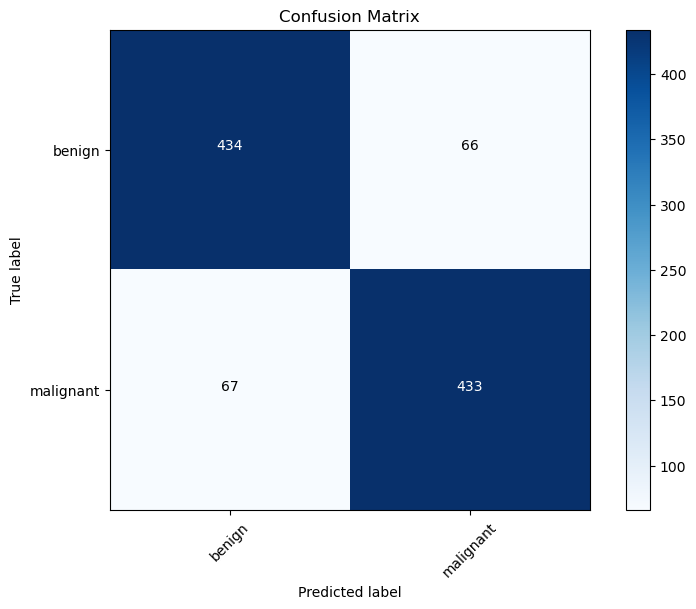

In [9]:
from sklearn import svm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from torchvision import transforms
import torch
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt

# 加载数据并预处理
data_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 定义数据集路径
train_data_dir = 'melanoma_cancer_dataset/train'  # 替换为实际的训练数据路径
test_data_dir = 'melanoma_cancer_dataset/test'    # 替换为实际的测试数据路径

# 加载数据集
train_dataset = torchvision.datasets.ImageFolder(root=train_data_dir, transform=data_transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_data_dir, transform=data_transform)

# 将数据转换为numpy数组
def convert_to_numpy(loader):
    data = []
    labels = []
    for inputs, targets in loader:
        data.append(inputs.numpy().reshape(len(inputs), -1))
        labels.append(targets.numpy())
    return np.concatenate(data), np.concatenate(labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

X_train, y_train = convert_to_numpy(train_loader)
X_test, y_test = convert_to_numpy(test_loader)

# 使用PCA进行降维
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 训练SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train_pca, y_train)

# 预测与评估
y_pred = clf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1 = 2 * (pre * rec) / (pre + rec)

print("SVM Accuracy: ", acc)
print("SVM Precision: ", pre)
print("SVM Recall: ", rec)
print("SVM F1 Score: ", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 可视化混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(train_dataset.classes))
plt.xticks(tick_marks, train_dataset.classes, rotation=45)
plt.yticks(tick_marks, train_dataset.classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
